In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df=pd.read_csv('C:/Users/hp/Downloads/Placement_dataset.csv')
df_copy=df.copy()
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
for col in df.columns.unique(): 
    print('\n',col,'\n',df[col].unique().size)


 sl_no 
 215

 gender 
 2

 ssc_p 
 103

 ssc_b 
 2

 hsc_p 
 97

 hsc_b 
 2

 hsc_s 
 3

 degree_p 
 89

 degree_t 
 3

 workex 
 2

 etest_p 
 100

 specialisation 
 2

 mba_p 
 205

 status 
 2

 salary 
 46


In [4]:
df.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df=df.fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
df=df.drop(['sl_no'],axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [11]:
df['gender']=le.fit_transform(df['gender'])
df['ssc_b']=le.fit_transform(df['ssc_b'])
df['workex']=le.fit_transform(df['workex'])
df['specialisation']=le.fit_transform(df['specialisation'])
df['status']=le.fit_transform(df['status'])
df['hsc_b']=le.fit_transform(df['hsc_b'])
df['hsc_s']=le.fit_transform(df['hsc_s'])
df['degree_t']=le.fit_transform(df['degree_t'])

<AxesSubplot:>

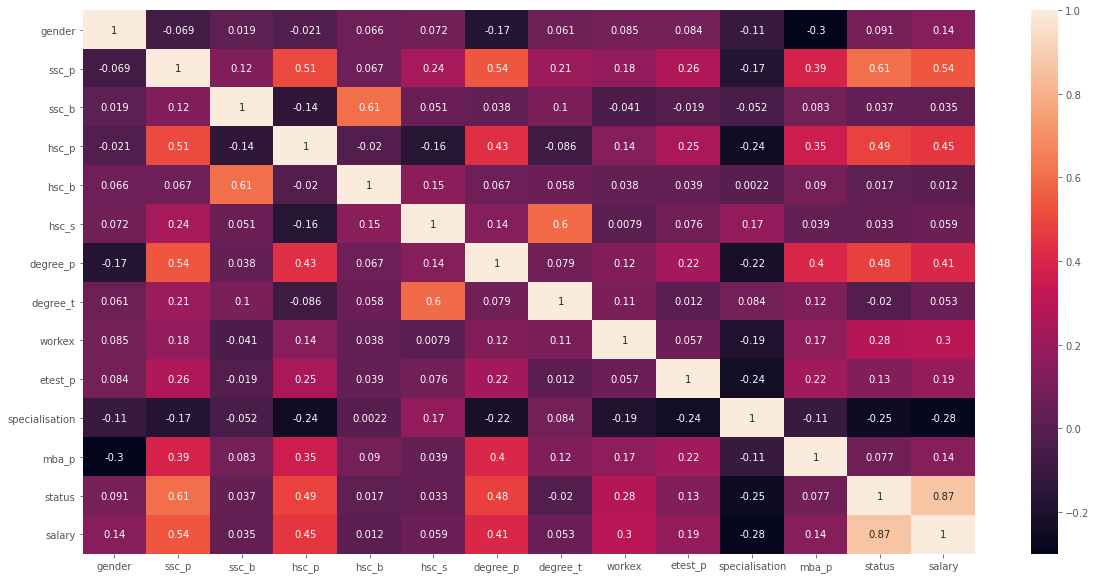

In [12]:
plt.figure(figsize=(20,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [13]:
df=pd.DataFrame(df)

In [14]:
X=df.drop(['status'],axis=1)
y=df['status']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
'''In the interest of preventing information 
about the distribution of the test set leaking into
your model we have fit the scaler on your training data only'''
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [17]:
y_pred=clf.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
result= confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(result)

result1=classification_report(y_test,y_pred)
print('Classification Report:')
print(result1)

result2=accuracy_score(y_test,y_pred)
print('Accuracy:',result2)

Confusion Matrix:
[[12  1]
 [ 1 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.98      0.98      0.98        41

    accuracy                           0.96        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.96      0.96      0.96        54

Accuracy: 0.9629629629629629


In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.96
Precision: 0.98
Recall: 0.98
F1: 0.98


<Figure size 720x576 with 0 Axes>

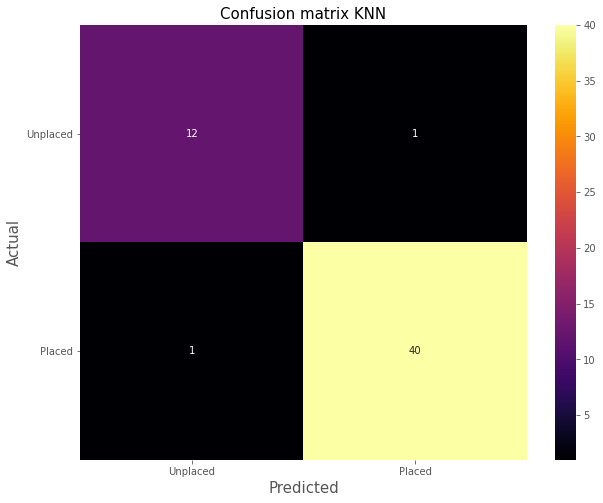

<Figure size 720x576 with 0 Axes>

In [20]:
from sklearn.metrics import confusion_matrix
labels=['Unplaced','Placed']
conf_mat_knn=confusion_matrix(y_test,y_pred)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = sns.heatmap(conf_mat_knn,ax=ax,annot=True,cmap='inferno')
ax.xaxis.set_ticklabels(['Unplaced', 'Placed'])
ax.yaxis.set_ticklabels(['Unplaced', 'Placed'],rotation=0)
ax.set_xlabel('Predicted',size=15)
ax.set_ylabel('Actual',size=15)
plt.title('Confusion matrix KNN',size=15)
plt.figure(figsize=(10,8))

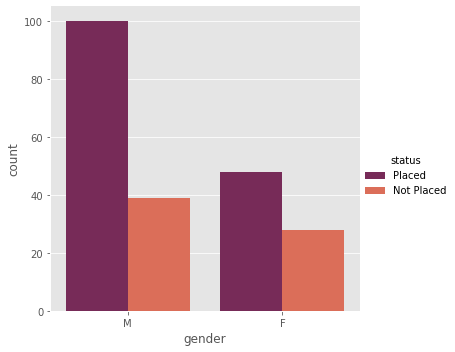

In [21]:
sns.catplot('gender',data=df_copy,kind='count',hue='status',palette='rocket')

Text(0.5, 1.0, 'M/F ratio=1.83')

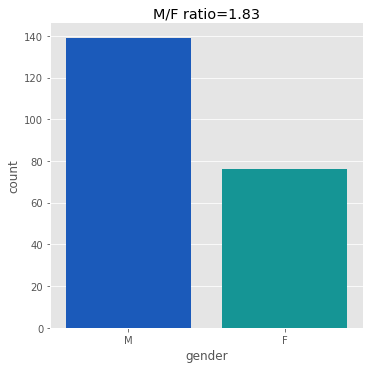

In [25]:
sns.factorplot('gender',data=df_copy,kind='count',palette='winter')
plt.title('M/F ratio={0:.2f}'.format(df_copy['gender'].value_counts()[0]/df_copy['gender'].value_counts()[1]))

The M/F is 1.83 which is approximately 2 which can be interpreted as for every 1 female candidate there are 2 male candidates sitting for placements.

In [26]:
df_male=df_copy[df_copy['gender']=='M']
df_male['status'].value_counts()

Placed        100
Not Placed     39
Name: status, dtype: int64

In [27]:
male_placed_ratio=df_male['status'].value_counts()[0]/df_male['status'].value_counts()[1]
print('Placement ratio of male candidates:{0:.2f}'.format(male_placed_ratio))

Placement ratio of male candidates:2.56


In [28]:
df_female=df_copy[df_copy['gender']=='F']
df_female['status'].value_counts()

Placed        48
Not Placed    28
Name: status, dtype: int64

In [29]:
female_placed_ratio=df_female['status'].value_counts()[0]/df_female['status'].value_counts()[1]
print('Placement ratio of female candidates:{0:.2f}'.format(female_placed_ratio))

Placement ratio of female candidates:1.71


Here from the placement ratios of the two genders we can conclude that males outperform the female condidates in this batch.

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

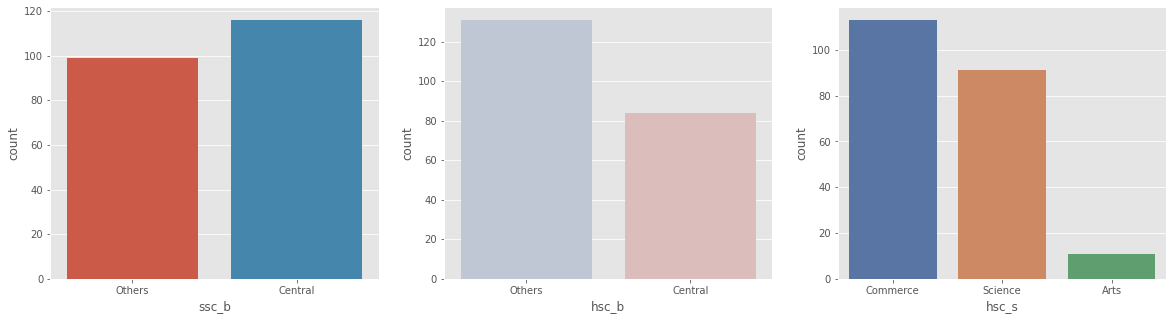

In [32]:
fig,axs=plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(df_copy['ssc_b'],ax=axs[0])
sns.countplot(df_copy['hsc_b'],ax=axs[1],palette='vlag')
sns.countplot(df_copy['hsc_s'],ax=axs[2],palette='deep')

<AxesSubplot:xlabel='status', ylabel='degree_p'>

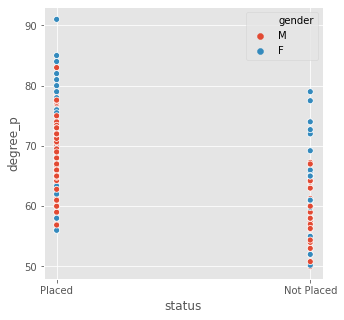

In [35]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='status',y='degree_p',hue='gender',data=df_copy)

Above plot shows the relation of degree % and status of gender if placed or not. This shows us that a good degree percentage doesn't guarantee getting placed.

<AxesSubplot:xlabel='status', ylabel='etest_p'>

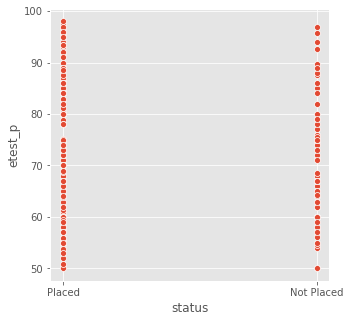

In [36]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='status',y='etest_p',data=df_copy)

Here the etest percentage doesn't seem to make a difference in the end prediction since various different scores result in either placed or not placed.

<AxesSubplot:xlabel='ssc_p', ylabel='hsc_p'>

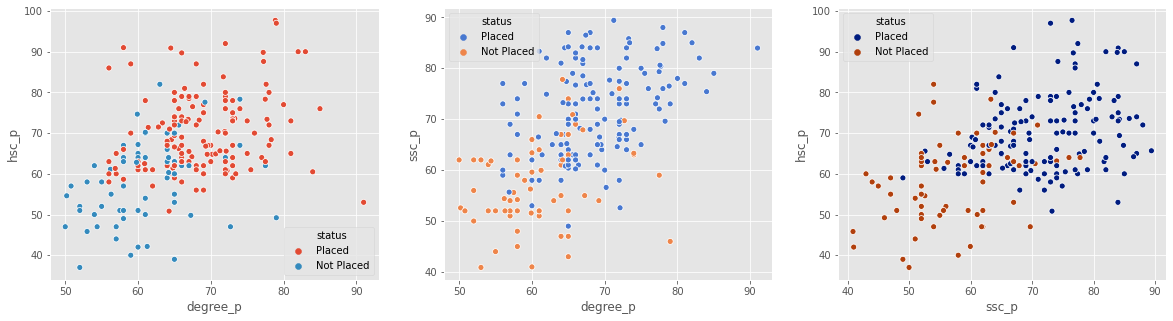

In [39]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.scatterplot(x = 'degree_p',y='hsc_p',hue='status',data = df_copy, ax= axs[0])
sns.scatterplot(x = 'degree_p',y='ssc_p',hue='status',data = df_copy, ax= axs[1], palette="muted")
sns.scatterplot(x = 'ssc_p',y='hsc_p',hue='status',data = df_copy, palette="dark", ax= axs[2])

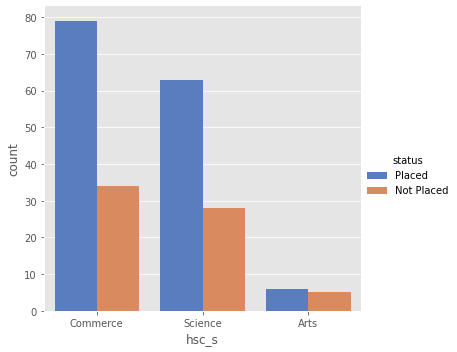

In [41]:
sns.catplot('hsc_s',data=df_copy,kind='count',hue='status',palette='muted')

Text(0.5, 24.0, 'Students')

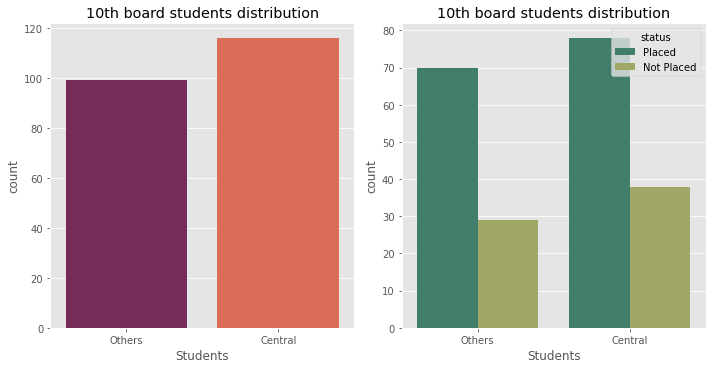

In [42]:
fig6=plt.figure(figsize=(10,5))

ax1 = fig6.add_subplot(121)

g = sns.countplot("ssc_b" , data=df_copy, ax=ax1,palette='rocket')

ax2=fig6.add_subplot(122)

g=sns.countplot('ssc_b',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('10th board students distribution')
ax1.set_xlabel('Students')
ax2.set_title('10th board students distribution')
ax2.set_xlabel('Students')

Placement ratio for each board is similar. hence we could say that 10th board of examination doesn't hold much value towards placement.

Text(0.5, 24.0, 'Students')

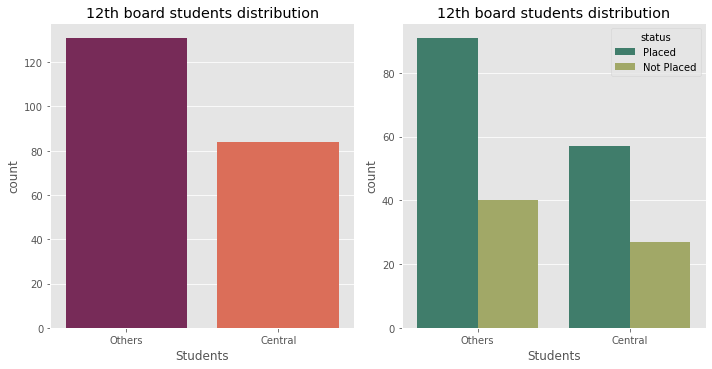

In [43]:
fig7=plt.figure(figsize=(10,5))

ax1 = fig7.add_subplot(121)

g = sns.countplot("hsc_b" , data=df_copy, ax=ax1,palette='rocket')

ax2=fig7.add_subplot(122)

g=sns.countplot('hsc_b',data=df_copy,ax=ax2,hue='status',palette='gist_earth')
plt.close(2)
plt.close(3)
plt.tight_layout()

ax1.set_title('12th board students distribution')
ax1.set_xlabel('Students')
ax2.set_title('12th board students distribution')
ax2.set_xlabel('Students')

Unlike the case for 10th board, more students opted for state boards in their 12th examinations. The performance of state board students was better as more students from state board of 12th were placed. However, the placed/unplaced ratio for both is nearly identical once again. Hence, 12th board is not playing a significant role once again.

Text(0.5, 1.0, 'Salary distribution for the batch')

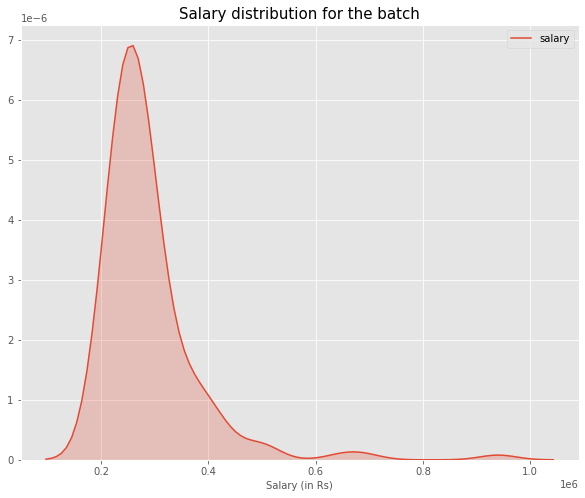

In [47]:
plt.figure(figsize=(10,8))
df_placed=df_copy[df_copy['salary']>0]
sns.kdeplot(df_placed['salary'],shade=True)
plt.xlabel('Salary (in Rs)',size=10)
plt.title('Salary distribution for the batch',size=15)

Majority of the packages lie in the region of 2-4 LPA

In [49]:
mean=df_copy['salary'].mean()
mean

288655.4054054054

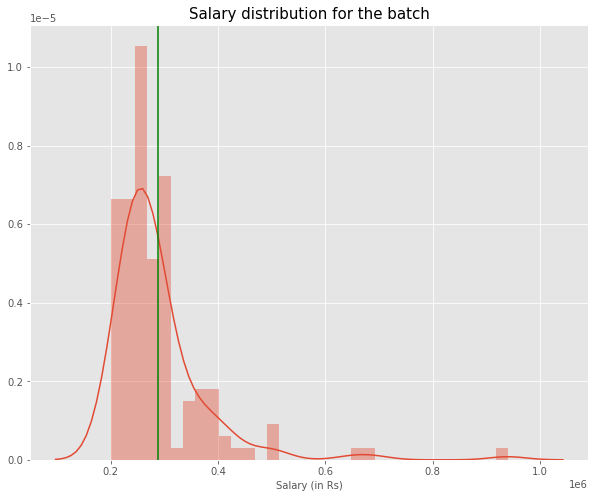

In [53]:
plt.figure(figsize=(10,8))
df_placed=df_copy[df_copy['salary']>0]
sns.distplot(df_placed['salary'])
plt.xlabel('Salary (in Rs)',size=10)
plt.title('Salary distribution for the batch',size=15)
plt.axvline(mean,color='green')